# Motor Maintenance

Let's combine the cabapilities of forecasting and anomaly detection for predictive maintenance:

In [102]:
%store -r bucket

In [103]:
%store -r data
data.head()

,device_id,motor_peak_mA,battery
timestamp,,,
2020-02-22 23:59:59,7517a917b42450470661cec1bd4654f8,1335,73
2020-02-22 23:59:59,8e4a851ed2317a249a0903f29d894361,1577,73
2020-02-22 23:59:59,572ddf9d82d5675ed2db832081b70103,1585,73
2020-02-22 23:59:59,b17bbc29ce61265a6212c689a597d4d8,0,73
2020-02-22 23:59:59,19d3c55b134ab7780d2b711211b7cf7c,1286,73


# Exploratory Data Analysis

In [104]:
device_pos = 1
sample_device_id = data.iloc[device_pos]["device_id"]
sample_device_id

'8e4a851ed2317a249a0903f29d894361'

In [105]:
sample_data = data[data["device_id"] == sample_device_id]

In [106]:
motor = sample_data["motor_peak_mA"]

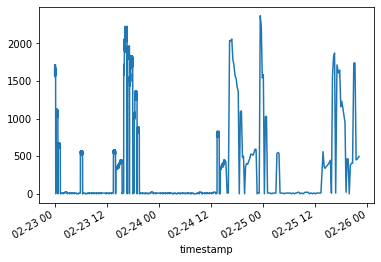

In [107]:
from matplotlib import pyplot
motor.plot()

# Time Series Resampling

In [108]:
hourly = data[data["motor_peak_mA"] > 0]
hourly = (hourly.groupby("device_id")
          .motor_peak_mA
          .resample("H")
          .max())

In [109]:
hourly

device_id                         timestamp          
0001495ce5f079703599a94c32dab2b0  2020-02-24 15:00:00    1843.0
                                  2020-02-24 16:00:00    1906.0
                                  2020-02-24 17:00:00    1909.0
                                  2020-02-24 18:00:00    1540.0
                                  2020-02-24 19:00:00     476.0
                                                          ...  
fffaee1fbb9c96703850f64d3262e843  2020-02-25 17:00:00    2211.0
                                  2020-02-25 18:00:00    1663.0
                                  2020-02-25 19:00:00     841.0
                                  2020-02-25 20:00:00     650.0
                                  2020-02-25 21:00:00     741.0
Name: motor_peak_mA, Length: 529940, dtype: float64

In [110]:
hourly = hourly.reset_index().set_index("timestamp")

In [111]:
hourly

,device_id,motor_peak_mA
timestamp,,
2020-02-24 15:00:00,0001495ce5f079703599a94c32dab2b0,1843.0
2020-02-24 16:00:00,0001495ce5f079703599a94c32dab2b0,1906.0
2020-02-24 17:00:00,0001495ce5f079703599a94c32dab2b0,1909.0
2020-02-24 18:00:00,0001495ce5f079703599a94c32dab2b0,1540.0
2020-02-24 19:00:00,0001495ce5f079703599a94c32dab2b0,476.0
...,...,...
2020-02-25 17:00:00,fffaee1fbb9c96703850f64d3262e843,2211.0
2020-02-25 18:00:00,fffaee1fbb9c96703850f64d3262e843,1663.0
2020-02-25 19:00:00,fffaee1fbb9c96703850f64d3262e843,841.0


In [112]:
hsample = hourly[hourly["device_id"] == sample_device_id]

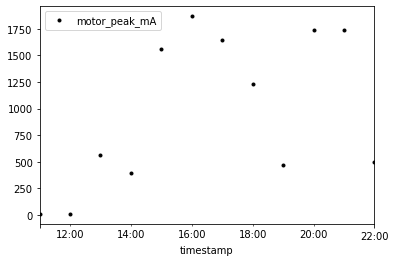

In [113]:
hsample.tail(12).plot(style="k.")

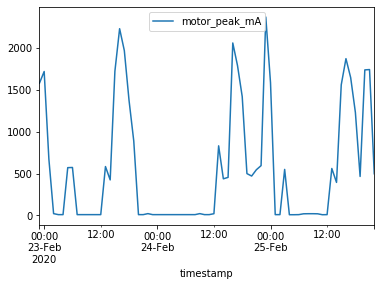

In [114]:
hsample.plot()

## Cross Validation

In [115]:
import pandas as pd

In [116]:
last_time = hourly.tail(1).index[0]
last_time

Timestamp('2020-02-25 21:00:00')

In [117]:
cut_time = last_time - pd.Timedelta('3 hour')
cut_time

Timestamp('2020-02-25 18:00:00')

In [118]:
train_set = hourly.loc[hourly.index <= cut_time]
train_set.tail()

,device_id,motor_peak_mA
timestamp,,
2020-02-25 14:00:00,fffaee1fbb9c96703850f64d3262e843,672.0
2020-02-25 15:00:00,fffaee1fbb9c96703850f64d3262e843,707.0
2020-02-25 16:00:00,fffaee1fbb9c96703850f64d3262e843,2286.0
2020-02-25 17:00:00,fffaee1fbb9c96703850f64d3262e843,2211.0
2020-02-25 18:00:00,fffaee1fbb9c96703850f64d3262e843,1663.0


In [119]:
test_set = hourly.loc[hourly.index > cut_time]
test_set.head()

,device_id,motor_peak_mA
timestamp,,
2020-02-25 19:00:00,0001495ce5f079703599a94c32dab2b0,688.0
2020-02-25 20:00:00,0001495ce5f079703599a94c32dab2b0,440.0
2020-02-25 21:00:00,0001495ce5f079703599a94c32dab2b0,550.0
2020-02-25 19:00:00,00134c004e33e830e5dbce3355a485b9,667.0
2020-02-25 20:00:00,00134c004e33e830e5dbce3355a485b9,454.0


In [120]:
sample_train = train_set[train_set["device_id"] == sample_device_id]
sample_test = test_set[test_set["device_id"] == sample_device_id]

In [121]:
sample_train.tail()

,device_id,motor_peak_mA
timestamp,,
2020-02-25 14:00:00,8e4a851ed2317a249a0903f29d894361,394.0
2020-02-25 15:00:00,8e4a851ed2317a249a0903f29d894361,1557.0
2020-02-25 16:00:00,8e4a851ed2317a249a0903f29d894361,1869.0
2020-02-25 17:00:00,8e4a851ed2317a249a0903f29d894361,1643.0
2020-02-25 18:00:00,8e4a851ed2317a249a0903f29d894361,1228.0


In [122]:
sample_test.head()

,device_id,motor_peak_mA
timestamp,,
2020-02-25 19:00:00,8e4a851ed2317a249a0903f29d894361,465.0
2020-02-25 20:00:00,8e4a851ed2317a249a0903f29d894361,1735.0
2020-02-25 21:00:00,8e4a851ed2317a249a0903f29d894361,1739.0
2020-02-25 22:00:00,8e4a851ed2317a249a0903f29d894361,497.0


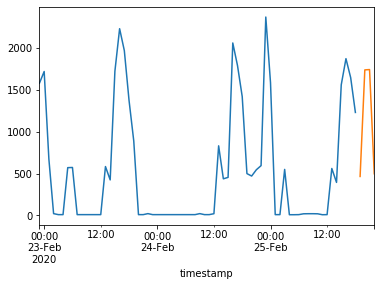

In [123]:
from matplotlib import pyplot

ax = sample_train["motor_peak_mA"].plot(label="train")
sample_test["motor_peak_mA"].plot(ax=ax,label="test")

## DeepAR Training

Convert the data from pandas DataFrame to the expected JSON Lines:

In [124]:
import json
import math

def df_to_tss(dataframe):
    df = dataframe.copy()
    df["timeindex"] = df.index
    cats = {}
    tss = {}
    for index, row in df.iterrows():
        target = row["motor_peak_mA"]
        if not(math.isnan(target)):
            identity = row["device_id"]
            cat = cats.get(identity)
            if not cat:
                cat = len(cats)
                start = str(row["timeindex"])
                ts = {
                    "start": start,
                    "cat": [cat],
                    "target": [],
                }
                cats[identity] = cat
                tss[cat] = ts
            ts = tss.get(cat)
            ts["target"].append(target)
    return tss

def tss_to_jsonl(tss):  
    result = ""
    for key, value in tss.items():
        jsonll = json.dumps(value)
        result += jsonll
        result += "\n"
    return result[:-1]

def df_to_jsonl(dataframe):
    return tss_to_jsonl(df_to_tss(dataframe))

In [125]:
import time
start = time.time()
jsonl = df_to_jsonl(train_set.head(100))
elapsed = time.time() - start
print(elapsed)
print(jsonl)

0.01434469223022461
{"start": "2020-02-24 15:00:00", "cat": [0], "target": [1843.0]}
{"start": "2020-02-24 16:00:00", "cat": [1], "target": [2171.0, 1949.0, 1769.0, 871.0, 477.0, 529.0, 570.0, 2202.0, 1483.0, 734.0, 10.0, 532.0, 817.0, 519.0, 617.0, 2146.0, 1870.0, 1397.0]}
{"start": "2020-02-24 15:00:00", "cat": [2], "target": [10.0, 2145.0, 1772.0, 1392.0, 909.0, 556.0, 658.0, 680.0, 2354.0, 1151.0, 21.0, 21.0, 10.0, 21.0, 21.0, 20.0, 10.0, 10.0, 21.0, 9.0, 20.0, 10.0, 681.0, 553.0, 608.0, 2014.0, 1685.0, 1518.0]}
{"start": "2020-02-24 15:00:00", "cat": [3], "target": [1580.0, 1997.0, 1735.0, 1202.0, 952.0, 436.0, 648.0, 694.0, 2252.0, 1345.0, 621.0, 10.0, 9.0, 10.0, 562.0]}


In [126]:
import time
start = time.time()

train_tss = df_to_tss(train_set)
train_jsonl = tss_to_jsonl(train_tss)

test_tss = df_to_tss(test_set)
test_jsonl = tss_to_jsonl(test_tss)

elapsed = time.time() - start
print(elapsed)

42.501381397247314


In [127]:
import pathlib

prefix = "mt-motor-maintenance"
input_path = "./{}/input".format(prefix)

train_path = "{}/train.json".format(input_path)
test_path = "{}/test.json".format(input_path)
(train_path,test_path)

('./mt-motor-maintenance/input/train.json',
 './mt-motor-maintenance/input/test.json')

In [128]:
import shutil

shutil.rmtree(input_path, ignore_errors=True)
pathlib.Path(input_path).mkdir(parents=True, exist_ok=True)

In [129]:
with open(train_path, "w") as text_file:
    print(train_jsonl, file=text_file)

with open(test_path, "w") as text_file:
    print(test_jsonl, file=text_file)

In [130]:
! ls -liah "{input_path}/"

total 5.2M
12050591088959177201 drwxr-xr-x 2 root root 6.0K May 14 10:53 .
 9857610803793291351 drwxr-xr-x 3 root root 6.0K May 14 10:53 ..
 5764175072212119634 -rw-r--r-- 1 root root 1.4M May 14 10:53 test.json
 5480359943514405345 -rw-r--r-- 1 root root 3.8M May 14 10:53 train.json


In [131]:
%store -r bucket

In [132]:
!aws s3 sync "{input_path}/" "s3://{bucket}/{prefix}/" --delete

delete: s3://mt-ml-workshop-yuixc09t/mt-motor-maintenance/output/mt-motor-maintenance-2021-05-14-09-50-38-590/output/model.tar.gz
upload: mt-motor-maintenance/input/test.json to s3://mt-ml-workshop-yuixc09t/mt-motor-maintenance/test.json
upload: mt-motor-maintenance/input/train.json to s3://mt-ml-workshop-yuixc09t/mt-motor-maintenance/train.json


In [133]:
!aws s3 ls "s3://{bucket}/{prefix}/" 

2021-05-14 10:53:26    1373977 test.json
2021-05-14 10:53:26    3962421 train.json


In [134]:
dar_input = {
    "train": "s3://{}/{}/train.json".format(bucket,prefix),
    "test": "s3://{}/{}/test.json".format(bucket,prefix)
}
dar_input

{'train': 's3://mt-ml-workshop-yuixc09t/mt-motor-maintenance/train.json',
 'test': 's3://mt-ml-workshop-yuixc09t/mt-motor-maintenance/test.json'}

In [135]:
train_instance_type='ml.c5.2xlarge' #Estimated Training Time: 10m

In [136]:
import boto3
import sagemaker
from sagemaker.amazon.amazon_estimator import get_image_uri

region = boto3.Session().region_name
dar_image_name = sagemaker.image_uris.retrieve('forecasting-deepar', region)
dar_image_name

'156387875391.dkr.ecr.us-west-2.amazonaws.com/forecasting-deepar:1'

In [137]:
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

dar_estimator = sagemaker.estimator.Estimator(
    sagemaker_session=sagemaker_session,
    image_uri=dar_image_name,
    role=role,
    instance_count=1,
    instance_type=train_instance_type,
    base_job_name=prefix,
    output_path="s3://{}/{}/output/".format(bucket,prefix)
)

In [138]:
freq = 'H'
prediction_length = 4
context_length = 12

In [139]:
dar_hyperparameters = {
    "time_freq": freq,
    "context_length": str(context_length),
    "prediction_length": str(prediction_length),
    "num_cells": "40",
    "num_layers": "3",
    "likelihood": "gaussian",
    "epochs": "20",
    "mini_batch_size": "32",
    "learning_rate": "0.001",
    "dropout_rate": "0.05",
    "early_stopping_patience": "10",
    "cardinality": "auto",
    "num_dynamic_feat":"ignore"
}
dar_estimator.set_hyperparameters(**dar_hyperparameters)

In [140]:
dar_estimator.fit(inputs=dar_input)

2021-05-14 10:53:27 Starting - Starting the training job...
2021-05-14 10:53:28 Starting - Launching requested ML instances......
2021-05-14 10:54:37 Starting - Preparing the instances for training...
2021-05-14 10:55:24 Downloading - Downloading input data...
2021-05-14 10:55:30 Training - Downloading the training image.....Arguments: train
[05/14/2021 10:56:35 INFO 140667699287680] Reading default configuration from /opt/amazon/lib/python3.6/site-packages/algorithm/resources/default-input.json: {'_kvstore': 'auto', '_num_gpus': 'auto', '_num_kv_servers': 'auto', '_tuning_objective_metric': '', 'cardinality': 'auto', 'dropout_rate': '0.10', 'early_stopping_patience': '', 'embedding_dimension': '10', 'learning_rate': '0.001', 'likelihood': 'student-t', 'mini_batch_size': '128', 'num_cells': '40', 'num_dynamic_feat': 'auto', 'num_eval_samples': '100', 'num_layers': '2', 'test_quantiles': '[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]'}
[05/14/2021 10:56:35 INFO 140667699287680] Merging 

In [141]:
dar_job_name = dar_estimator.latest_training_job.name
dar_job_name

'mt-motor-maintenance-2021-05-14-10-53-27-268'

# Random Cut Forest Training

In [142]:
anomalies = data[["motor_peak_mA"]]
anomalies = anomalies[anomalies["motor_peak_mA"] > 0]
anomalies.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3079934 entries, 2020-02-22 23:59:59 to 2020-02-25 22:03:11
Data columns (total 1 columns):
 #   Column         Dtype
---  ------         -----
 0   motor_peak_mA  int64
dtypes: int64(1)
memory usage: 47.0 MB


In [143]:
from sklearn.model_selection import train_test_split

train_data, test_dataframe = train_test_split(anomalies, test_size=0.2)

In [144]:
test_data = test_dataframe.copy()
test_data["anomaly"] = test_data["motor_peak_mA"] > 4000
test_data["anomaly"] = test_data["anomaly"] | (test_data["motor_peak_mA"] > 50) & (test_data["motor_peak_mA"] < 200)
test_data["anomaly"] = test_data["anomaly"].astype(int) 
test_data.groupby("anomaly").count().head()

,motor_peak_mA
anomaly,
0,615637
1,350


In [145]:
test_data.describe()

,motor_peak_mA,anomaly
count,615987.000000,615987.000000
mean,524.811933,0.000568
std,685.952785,0.023830
min,9.000000,0.000000
25%,10.000000,0.000000
50%,21.000000,0.000000
75%,797.000000,0.000000
max,5752.000000,1.000000


In [146]:
train_data.describe()

,motor_peak_mA
count,2.463947e+06
mean,5.251241e+02
std,6.858596e+02
min,9.000000e+00
25%,1.000000e+01
50%,2.100000e+01
75%,7.980000e+02
max,7.730000e+03


In [147]:
train_array = train_data.values
train_array

array([[2733],
       [ 502],
       [ 588],
       ...,
       [  10],
       [   9],
       [   9]])

In [148]:
test_array = test_data[["motor_peak_mA"]].values
test_array

array([[ 10],
       [774],
       [ 21],
       ...,
       [657],
       [  9],
       [ 10]])

In [149]:
labels_array = test_data["anomaly"].values
labels_array

array([0, 0, 0, ..., 0, 0, 0])

In [150]:
import io
import numpy as np
import sagemaker
import sagemaker.amazon.common as smac
import boto3

s3bucket = boto3.resource('s3').Bucket(bucket)

def upload_records(array,key,labels=None):
    result = {} 
    buf = io.BytesIO()
    if (labels is not None):
        smac.write_numpy_to_dense_tensor(buf, array, labels)
    else:
        smac.write_numpy_to_dense_tensor(buf, array)
    buf.seek(0)
    s3bucket.Object(key).upload_fileobj(buf)

In [151]:
import os

s3 = boto3.client("s3")
prefix = "mt-motor-anomaly" 

cwd = os.getcwd()
train_key  = "{}/input/{}".format(prefix,"train.rio")
test_key  = "{}/input/{}".format(prefix, "test.rio")

upload_records(train_array,train_key)
upload_records(test_array,test_key,labels_array)

train_input = sagemaker.inputs.TrainingInput(
       s3_data="s3://{}/{}".format(bucket,train_key),
       content_type='application/x-recordio-protobuf',
       distribution='ShardedByS3Key')

test_input = sagemaker.inputs.TrainingInput(
       s3_data="s3://{}/{}".format(bucket,test_key),
       content_type='application/x-recordio-protobuf',
       distribution='FullyReplicated')

rcf_input = {
    'train': train_input,
    'test': test_input     
}

rcf_input

{'train': <sagemaker.inputs.TrainingInput at 0x7fc595013b10>,
 'test': <sagemaker.inputs.TrainingInput at 0x7fc595c55c50>}

In [152]:
region = boto3.Session().region_name
from sagemaker.amazon.amazon_estimator import get_image_uri

region = boto3.Session().region_name
rcf_container = sagemaker.image_uris.retrieve('randomcutforest', region)
rcf_container

'174872318107.dkr.ecr.us-west-2.amazonaws.com/randomcutforest:1'

In [153]:
rcf_hparams = {
    "num_samples_per_tree":512,
    "num_trees":50,
    "feature_dim":1,
    "eval_metrics": "accuracy"
}

In [154]:
rcf_estimator = sagemaker.estimator.Estimator(
                      rcf_container,
                      role=sagemaker.get_execution_role(),
                      instance_count=1,
                      instance_type='ml.m5.large',
                      base_job_name="mt-motor-anomaly",
                      output_path='s3://{}/{}/output'.format(bucket, prefix),
                      hyperparameters = rcf_hparams )

In [155]:
rcf_estimator.fit(rcf_input)

2021-05-14 11:02:55 Starting - Starting the training job...
2021-05-14 11:02:57 Starting - Launching requested ML instances......
2021-05-14 11:04:06 Starting - Preparing the instances for training......
2021-05-14 11:04:56 Downloading - Downloading input data...
2021-05-14 11:05:40 Training - Downloading the training image.Docker entrypoint called with argument(s): train
Running default environment configuration script
[05/14/2021 11:06:04 INFO 140128255715136] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-conf.json: {'num_samples_per_tree': 256, 'num_trees': 100, 'force_dense': 'true', 'eval_metrics': ['accuracy', 'precision_recall_fscore'], 'epochs': 1, 'mini_batch_size': 1000, '_log_level': 'info', '_kvstore': 'dist_async', '_num_kv_servers': 'auto', '_num_gpus': 'auto', '_tuning_objective_metric': '', '_ftp_port': 8999}
[05/14/2021 11:06:04 INFO 140128255715136] Merging with provided configuration from /opt/ml/input/config/h

In [156]:
print('Training job name: {}'.format(rcf_estimator.latest_training_job.job_name))

Training job name: mt-motor-anomaly-2021-05-14-11-02-55-160


# Random Cut Forest Inference

In [157]:
rcf_inference = rcf_estimator.deploy(
    initial_instance_count=1,
    instance_type='ml.m5.large',
)

---------------!

In [158]:
rcf_inference_endpoint = rcf_inference.endpoint_name
%store rcf_inference_endpoint
rcf_inference_endpoint

Stored 'rcf_inference_endpoint' (str)


'mt-motor-anomaly-2021-05-14-11-07-07-725'

In [159]:
from sagemaker.predictor import csv_serializer, json_deserializer

rcf_inference.serializer = sagemaker.serializers.CSVSerializer()
rcf_inference.deserializer = sagemaker.deserializers.JSONDeserializer()

In [160]:
sample_data = train_data[:5].values
sample_data

array([[2733],
       [ 502],
       [ 588],
       [   9],
       [1716]])

In [161]:
results = rcf_inference.predict(sample_data)
results

{'scores': [{'score': 2.1405117711},
  {'score': 0.7650028567},
  {'score': 0.7646428522},
  {'score': 0.7519637363},
  {'score': 0.8903589727}]}

In [162]:
import pandas as pd
sigmas = 1

scores = results["scores"]
scores = [score["score"] for score in scores]
series = pd.Series(scores)
score_mean = series.mean()
score_max = series.max()
score_std = series.std()
score_cutoff = score_mean + sigmas*score_std
(score_mean,score_max,score_std,score_cutoff)

(1.0624960377999997, 2.1405117711, 0.6052681458807184, 1.6677641836807182)

In [163]:
anomalies = series[series > score_cutoff ]  
anomalies

0    2.140512
dtype: float64

In [164]:
"{} anomalies detected".format(len(anomalies))

'1 anomalies detected'

# Deep AR Inference

In [165]:
dar_endpoint_name = sagemaker_session.endpoint_from_job(
    job_name=dar_job_name,
    initial_instance_count=1,
    instance_type='ml.m5.large',
    image_uri=dar_image_name,
    role=role
)
dar_endpoint_name

---------------!

'mt-motor-maintenance-2021-05-14-10-53-27-268'

In [166]:
len(train_tss)

16946

In [167]:
instances = list(train_tss.values())[0:100]

In [168]:
len(instances)

100

In [169]:
inference = {
    "instances": instances,
    "configuration": {
         "output_types": ["mean"]
    }
}

In [170]:
import json
inference_json = json.dumps(inference, indent=2)
print(inference_json)

{
  "instances": [
    {
      "start": "2020-02-24 15:00:00",
      "cat": [
        0
      ],
      "target": [
        1843.0
      ]
    },
    {
      "start": "2020-02-24 16:00:00",
      "cat": [
        1
      ],
      "target": [
        2171.0,
        1949.0,
        1769.0,
        871.0,
        477.0,
        529.0,
        570.0,
        2202.0,
        1483.0,
        734.0,
        10.0,
        532.0,
        817.0,
        519.0,
        617.0,
        2146.0,
        1870.0,
        1397.0
      ]
    },
    {
      "start": "2020-02-24 15:00:00",
      "cat": [
        2
      ],
      "target": [
        10.0,
        2145.0,
        1772.0,
        1392.0,
        909.0,
        556.0,
        658.0,
        680.0,
        2354.0,
        1151.0,
        21.0,
        21.0,
        10.0,
        21.0,
        21.0,
        20.0,
        10.0,
        10.0,
        21.0,
        9.0,
        20.0,
        10.0,
        681.0,
        553.0,
        608.0,
      

In [171]:
from sagemaker.deserializers import JSONDeserializer
from sagemaker.serializers import JSONSerializer

predictor = sagemaker.predictor.Predictor(
    dar_endpoint_name, 
    sagemaker_session=sagemaker_session, 
    serializer=JSONSerializer(),
    deserializer=JSONDeserializer())
predictor

In [173]:
prediction = predictor.predict(inference)
prediction

{'predictions': [{'mean': [2156.4060058594,
    1874.1242675781,
    1427.0601806641,
    730.9706420898]},
  {'mean': [1518.8516845703, 1188.1329345703, 888.1737670898, 787.5779418945]},
  {'mean': [1010.8931884766, 644.3718261719, 433.2434387207, 566.5250244141]},
  {'mean': [864.7713012695, 748.9321899414, 654.4508056641, 762.6679077148]},
  {'mean': [779.4497680664, 429.6017150879, 341.8963928223, 388.0269775391]},
  {'mean': [718.8358764648, 562.6910400391, 637.9756469727, 1716.8004150391]},
  {'mean': [1149.6647949219, 902.3166503906, 872.1148681641, 989.859375]},
  {'mean': [687.3181762695, 467.9446411133, 463.7035217285, 711.005065918]},
  {'mean': [1464.6351318359, 1074.5883789062, 823.7182617188, 853.4039916992]},
  {'mean': [765.9538574219, 522.4611206055, 591.0625610352, 980.2604980469]},
  {'mean': [1074.3918457031, 936.2238769531, 845.0233764648, 1000.8374023438]},
  {'mean': [967.6097412109, 664.5266113281, 632.0560302734, 735.3997802734]},
  {'mean': [728.045715332, 545

In [174]:
predictions = prediction["predictions"]
predictions = [p["mean"] for p in predictions]
predictions

[[2156.4060058594, 1874.1242675781, 1427.0601806641, 730.9706420898],
 [1518.8516845703, 1188.1329345703, 888.1737670898, 787.5779418945],
 [1010.8931884766, 644.3718261719, 433.2434387207, 566.5250244141],
 [864.7713012695, 748.9321899414, 654.4508056641, 762.6679077148],
 [779.4497680664, 429.6017150879, 341.8963928223, 388.0269775391],
 [718.8358764648, 562.6910400391, 637.9756469727, 1716.8004150391],
 [1149.6647949219, 902.3166503906, 872.1148681641, 989.859375],
 [687.3181762695, 467.9446411133, 463.7035217285, 711.005065918],
 [1464.6351318359, 1074.5883789062, 823.7182617188, 853.4039916992],
 [765.9538574219, 522.4611206055, 591.0625610352, 980.2604980469],
 [1074.3918457031, 936.2238769531, 845.0233764648, 1000.8374023438],
 [967.6097412109, 664.5266113281, 632.0560302734, 735.3997802734],
 [728.045715332, 545.219543457, 586.4124145508, 1572.0998535156],
 [1386.1036376953, 1165.4754638672, 992.6310424805, 1073.5567626953],
 [813.3214111328, 595.287902832, 464.6274719238, 659.

In [175]:
sigmas = 1.25
maintenance = []

for i, preds in enumerate(predictions):
    infer_data = [[t] for t in preds]
    results = rcf_inference.predict(infer_data)
    scores = results["scores"]
    scores = [score["score"] for score in scores]
    series = pd.Series(scores)
    score_mean = series.mean()
    score_max = series.max()
    score_std = series.std()
    score_cutoff = score_mean + sigmas*score_std
    anomalies = series[series > score_cutoff ]
    if not anomalies.empty:
        maintenance.append(i)
        print(" Device {} = {} anomalies (max = {}, cutoff = {})".format(i, len(anomalies), score_max, score_cutoff ))

 Device 2 = 1 anomalies (max = 0.8768996912, cutoff = 0.8673524912516744)
 Device 4 = 1 anomalies (max = 1.1622519743, cutoff = 1.1242054237617012)
 Device 8 = 1 anomalies (max = 0.9263862384, cutoff = 0.9208593531369319)
 Device 10 = 1 anomalies (max = 0.8917608626, cutoff = 0.8906141494014859)
 Device 15 = 1 anomalies (max = 0.9101585938, cutoff = 0.909986048048814)
 Device 16 = 1 anomalies (max = 1.0280485887, cutoff = 1.0043840534885207)
 Device 21 = 1 anomalies (max = 0.8410018879, cutoff = 0.8382200674802354)
 Device 23 = 1 anomalies (max = 0.9511436509, cutoff = 0.9454823739544687)
 Device 25 = 1 anomalies (max = 0.9873395233, cutoff = 0.9762839693651011)
 Device 26 = 1 anomalies (max = 0.9436370366, cutoff = 0.9357432845104956)
 Device 28 = 1 anomalies (max = 0.9302511606, cutoff = 0.9255247689910323)
 Device 29 = 1 anomalies (max = 1.85024109, cutoff = 1.761965874605883)
 Device 30 = 1 anomalies (max = 0.8810684899, cutoff = 0.8792885687422496)
 Device 32 = 1 anomalies (max = 

In [176]:
"Requesting maintenance for {} devices".format(len(maintenance))

'Requesting maintenance for 46 devices'

# Cleanup

Congratulations, you have saved a lot of trips to failed moontracer devices and made lunar energy more efficient and reliable.

Don't forget to [delete unused resources](mt-cleanup.ipynb).